# Text Analysis

## Introduction

Every now and then you may want to analyze text that you have mined or even written yourself. For example, you may want to see (out of curiousity) what word occurs the most in a body of text.

In this notebook, we are going to analyze a well-cited astrochemistry article, titled "Rotational Excitation of CO by Collisions with He, H, and H$_2$ Under Conditions in Interstellar Clouds" by Green and Thaddeus, published in _The Astrophysical Journal_ in 1976.

Normally you would have to mine the text out of a PDF - I've already done this step for you (albeit poorly). The data is located in the `data` directory.

To make sure the comparison is consistent throughout the analysis, we have to make sure we remove as much of the special characters and lower/upper casing as possible.

## Aim

The objective in this notebook is to open the text file in Python, parse out every word, and generate a histogram of word occurances. The scope will be to pick up all of the words __longer than 5 characters__, and count the number of times they appear.

__Note that your partner will have to perform the same analysis on a different text! Make sure your code is clean and well documented!__

These are the steps you need to take:

1. Open the text file for reading
2. Remove special characters from the text and remove case-sensitivity
    - I recommend replacing special characters with spaces!
3. Loop through the words, and incrementing each time you find the same word again.
4. Histogram count the words
    - This can be done with the `Counter` function from `collections`, or with `pandas DataFrame` built-in methods.
5. Plot up the histogram with `matplotlib`

This is the preamble you probably need:

In [2]:
%matplotlib inline
# This function will count the occurances in a list
from collections import Counter

# For your histogram needs
import numpy as np

# Optional, if you're courageous!
import pandas as pd

# For the plotting
from matplotlib import pyplot as plt

## Method

1. Open a text file and read in its contents in a "Pythonic" way.

In [3]:
with open("data/GreenThaddeus-1976-ApJ.txt") as read_file:
    lines = read_file.read()

2. Clean up the text so that it's more easily processed, i.e. removing newline characters and other special characters

In [4]:
for character in ["\n", ",", ".", """(""", """)""", """:""", """*"""]:
    lines = lines.replace(character, " ")

3. I chose to store the data in a Python dictionary, where the key corresponds to the word, and the value is the count.

In [5]:
word_dict = dict()

In [6]:
for word in lines.split(" "):
    # If there are more than 5 characters, and is not a number then we count
    if len(word) > 5 and word.isdigit() is False:
        # If the word is not already in the dictionary, add it in
        if word.lower() not in word_dict:
            word_dict[word.lower()] = 1
        # Otherwise just increment the counter
        else:
            word_dict[word.lower()]+=1

4. The way I chose to analyze the data was to use `pandas`. You can easily convert the dictionary into a `pandas` `DataFrame`, which handles in a SQL-like fashion. I've oriented the `DataFrame` such that the words are in the index, and column 0 is the occurance.

In [7]:
df = pd.DataFrame.from_dict(word_dict, orient="index")

5. The values are sorted in descending order, and in place (so nothing is returned from the function call)

In [8]:
df.sort_values([0], ascending=False, inplace=True)

6. Since I didn't want to swamp the figure, I am plotting only the top 10 occurances of a word. The `iloc` method will let you slice/select indices of a dataframe. I code below simply chooses the first 10 values of a dataframe.

In [9]:
cut_df = df.iloc[:10]

Text(0.5,1,'Top 10 words in Green & Thaddeus, 1976')

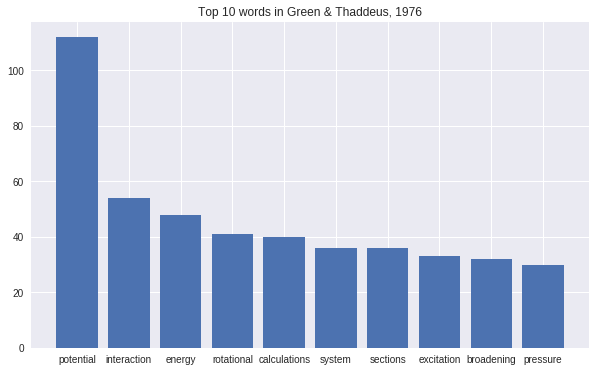

In [13]:
plt.style.use("seaborn")

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(cut_df.index, cut_df[0])

ax.set_title("Top 10 words in Green & Thaddeus, 1976")

In [14]:
fig.savefig("figures/Green1976-top10.png", dpi=300)

## Partner objective

Send your partner your notebook and the other text file (data/Schlegel-arxiv.txt). Tell them to run your notebook, and then ask them to perform the same analysis with the __top 5 words with 4 or more characters!__